# Signal Processing in Biomedical 


# INTRODUCTION:


# ECG: 

   The electrical activity of the heart recorded by electrodes placed on the body surface is called an electrocardiogram or ECG. ECG record of a normal beat of the heart, called the normal sinus rhythm. It consists of a P wave, a QRS complex, and a T wave, caused by atrial depolarization, ventricular depolarization, and ventricular repolarization, respectively. Atrial repolarization is masked by the QRS complex and is not visible in the ECG.[1]

# ECG SIGNAL:

   ECG signals consist of P, Q, R, S AND T waves.The distance between two successive peaks of the P-R interval is measured from onset of P waves to onset QRS complex, any variaton in in this P-R interval determines abnormality in signals.Normality or abnormality of ECG signal cannot be defined by considering only amplitudes of its wave.Pathologists might manually change the nob of the ECG recording machine to increase or decrease the amplitude waves.

   

Question 3 and 4
 ECG signal

In [1]:
%matplotlib inline

import pylab as pl
import scipy.linalg
import scipy as sci
import numpy as np
import matplotlib.pyplot as plt

#we use a simple open command for the file (basic Python)
s = open('aami3a.dat','rb')
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
signal = np.fromfile(s,count=-1,dtype=np.uint16)
print('\n file length:' + str(len(signal)))


 file length:43081


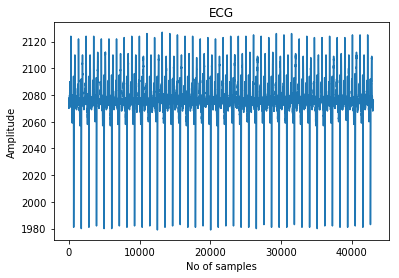

In [2]:
plt.plot(signal[:43081])#expected from 43081 samples x 1 lines
plt.title('ECG')
plt.xlabel('No of samples')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
s.close()

Question 5: calculating no of samples

A persons average rate is 60-100 bpm.

if we assume 90 bpm then,
90/60 = 1.5 (beats per second)
Now, since we want 5 beats in the signal
Therefore, 1.5*5 = 7.5
Thus, number of signals = 7.5/(1.5*10e-3)
                        = 5000


Question 6: Plotting ECG for 5 caradic signals


  number of samples for 5 beats in a signal: 5000


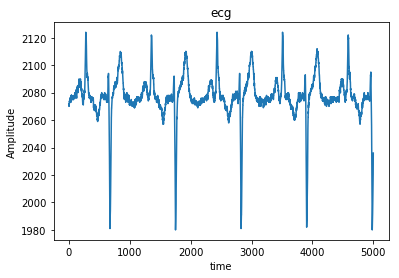

In [3]:
x=np.arange(0,5000/750.,1/750.) #start,stop,step 
print('\n  number of samples for 5 beats in a signal: ' + str(len(x)) )
plt.plot(signal[:5000])
plt.title('ecg')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
s.close() 

Question 7:

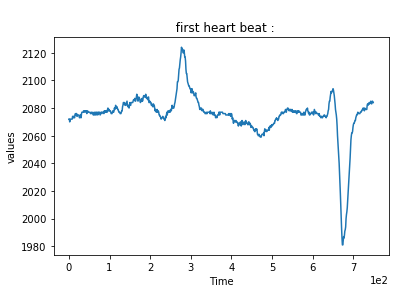

In [4]:
x=np.arange(0,750/750.,1/750.)#start,stop,step 
plt.plot(signal[:750])
plt.title('\n  first heart beat :')
plt.xlabel('Time')
plt.ylabel('values')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
s.close()


Because of short QRS complex curve, person has low blood pressure.

QUESTION 8: determing Heart rate from plot

QRS 2124


NameError: name 'Signal' is not defined

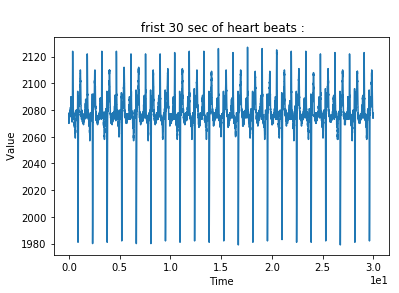

In [5]:
x=np.arange(22500)
a=0
x=np.arange(0,22500/750., 1/750.)
plt.plot(x,signal[:22500])
plt.title('\n frist 30 sec of heart beats :')
plt.xlabel('Time')
plt.ylabel(' Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
x1=np.amax(signal[:750])
print 'QRS ' +str (x1)
for index in x:
    if Signal[index]>=2124:
        a=a+1
print 'Heart beats/minute' +str(a*2)        
        
    

Question 9 and 10

Peak in DFT data is 4.98176674504
Maximum is observed at f=1.39275766017


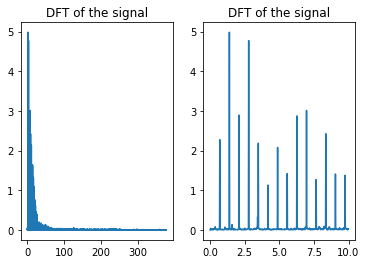

In [6]:
Line=signal[:43081]
data=Line-np.mean(Line)
L1=np.arange(21540)
L=len(data)

f=np.arange(0,75e1/2,75e1/43081)
Y=np.fft.fft(data)
Pyy=abs(Y)/L

plt.subplot(121)
plt.plot(f, Pyy[:21541])
plt.title('DFT of the signal')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))

inx=np.where(f>10)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT of the signal')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
x1=np.amax(Pyy[:21540])
print 'Peak in DFT data is ' +str(x1)
for index in L1:
    if Pyy[index]>=4.9814:
        print 'Maximum is observed at f=' +str(index/57.44)  
        break 
       

Q11) Calculating Heart Rate From Spectrum
                                          Heart Rate(bpm) = 60/(R Peak)
                                          H .R = 60/1.39275766017
                                          H.R = 43.08bpm

Question 14:
   Butterworth filter

In [17]:
from scipy.signal import butter, lfilter 
def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs #Nyquist frequeny is half the sampling frequency
    normal_cutoff = cutoff / nyq 
    b,a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
    
def butter_lowpass_filter(data, cutoff, fs, order):
    b,a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    z=1
    return y

filtered = butter_lowpass_filter(z, 10e1, 200.0, 4)#cutoff, sampling frequency and order

plt.figure (figsize=(12,8))
plt.subplot(211)
plt.plot(Trace, color='Blue', alpha=0.5, label='Original Signal')
plt.legend(loc=4)
plt.subplot(212)
plt.plot(filtered, color='Red', label='Filtered Signal')

plt.legend(loc=4)
plt.show()

NameError: name 'z' is not defined

QUESTION 15:

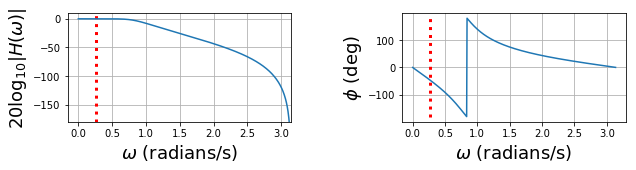

In [16]:
 from scipy import signal
import numpy as np
from __future__ import division
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((10,5))

fs=750
NF=fs/2
cutoff= 100
Wn=100/NF
b,a=signal.butter(4,Wn,btype='low',analog= False)
w,h=signal.freqz(b,a)
o=signal.lfilter(b,a,data)
x=np.arange(0,43081/750.,1/750. )  #start,stop,step
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=10)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()
ax = fig.add_subplot(plt.subplot(gs[0,1]))
plt.plot(w,np.angle(h)/np.pi*180)

ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=18)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()

Question 16:
    DFT Filtered SIGNAL

In [11]:
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((10,5))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

sp=len(l)
ab=np.arange(0,750/2,750/43080.)
Y=np.fft.fft(l)
P=abs(Y)/sp
#note:L/2 elements which are the positive frequencies and we are normalizing
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.plot(ab, P[:21540])
ax.set_title('DFT of filtered signal')
ax.set_ylabel("freq",fontsize=10)
ax.set_xlabel('sampling rate',fontsize=8)
indx=np.where(ab>25)
indx=indx[0]
ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(ab[:indx[0]], P[:indx[0]])
ax.set_title('DFT of filtered signal')
ax.set_ylabel("freq",fontsize=10)
ax.set_xlabel('sampling rate',fontsize=8)

ax.grid()

p=np.amax(P[:21540])
print 'Peak in DFT data is ' +str(p)
L2=np.arange(21540)--
for index in L2:
    if Pyy[index]>=4.98:
        print 'Maximum is observed at f=' +str(index/57.44)  
        break 

NameError: name 'l' is not defined

# REFERENCES:
1. Sabitha Ramakrishnan; Rithicka Yogeswaran 
2017 Trends in Industrial Measurement and Automation (TIMA) 
2. Krupa Suresh Bhavsar; Hen-Geul Yeh; Perla Ayala 
2017 IEEE International Symposium on Circuits and Systems (ISCAS) 
Year: 2017 